#CA05- Logistic Regression#




##1. The Application##
Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information. 



In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, recall_score, auc

In [ ]:
# read csv
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [ ]:
# descriptions
data.describe 

# non-null values in each column 
data.count()

# nulls in each row 
data.isnull().sum()

# range, column, number of non-null objects of each column, datatype and memory usage 
data.info()

# show head & tail
data.tail()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


##2. Deliverables##

**Part 1:** build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible(deliverable: Notebook)

**Part 2:**Display the Feature Importance of all the features sorted in the order of decreasing influenceon the CVD Risk (deliverable: Notebook)

**Part 3:** Evaluate the performance of your model(including ROC Curve), explain the performanceand draw a meaningful conclusion.(deliverable: Performanceoutputs in Notebook, explanationand conclusion in Word/PDF document)

Part 1:

In [ ]:
# set up target & feature variables

# target variable
y = data.cvd_4types

# features are the rest of the columns
x = data.drop(['cvd_4types'], axis = 1)

# scale data
scaler = StandardScaler()
scaler.fit(x) 
x_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

# splitting data into train and test following the 70/30 rule
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, 
                                                    random_state = 0)

In [ ]:
# fit logistic regression classifier
clf = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')
fitted_model = clf.fit(x_train, y_train)

# accuracy score 
print(clf.score(x_test, y_test))

# predict
prediction_result = clf.predict(x_test)

0.6824254881808839


Part 2: 

In [ ]:
# display feature importance 
importance = clf.coef_

# create dictionary for feature 
feature_dict = {}
for coefficients, feature in zip(importance[0,:], x.columns): 
  feature_dict[feature] = coefficients
feature_dict

# create data frames with features and coefficients 
df = pd.DataFrame.from_dict(feature_dict, orient = 'index', columns = ['Coefficients'])
df

# remove negative values
coeff_data = df[df['Coefficients'] > 0]

# sort in descending order 
coeff_data = coeff_data.sort_values(by = 'Coefficients', ascending = False)
coeff_data  

,Coefficients
parrptdiab,0.670666
educat,0.282205
srhype,0.246997
bend25,0.152769
tired25,0.131113
waist,0.092574
age_s1,0.001899


Part 3:

Confusion Matrix:
   TN = 181
   FP = 207
   FN = 116
   TP = 469
Accuracy: 0.668
Precision: 0.6938
Recall Score: 0.8017
F1-Score: 0.658
Sensitivity: 0.8017
Specificity: 0.4665
ROC AUC Score: 0.6341


Text(0.5, 1.0, 'ROC Curve')

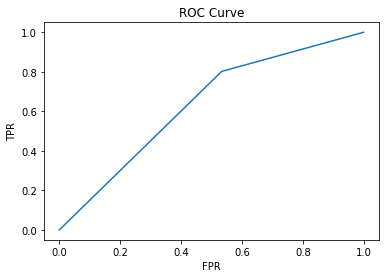

In [ ]:
# tests for true negatives, false positives, false negatives and true positives 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels = [0, 1]).ravel()
print('Confusion Matrix:')
print('   TN =', tn)
print('   FP =', fp) 
print('   FN =', fn)
print('   TP =', tp)

# testing accuracy of y_test from y_pred
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy, 4))

# testing precision of y_test from y_pred
precision = precision_score(y_test, y_pred)
print('Precision:', round(precision, 4))

# recall score
recallscore = recall_score(y_test, y_pred)
print('Recall Score:', round(recallscore, 4))

# testing weighted average of precision and recall (takes both false positives and false negatives into account)
f1score = f1_score(y_test, y_pred, labels = [0, 1], average = 'weighted') 
print('F1-Score:', round(f1score, 4))

# sensitivity 
sensitivity = tp/(tp+fn)
print('Sensitivity:', round(sensitivity, 4))

#specificity
specificity = tn/(tn+fp)
print('Specificity:', round(specificity, 4)) 

# calculating roc & auc: looking at the tradeoff between true positives and false positives at different thresholds
rocauc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score:', round(rocauc, 4))

# graphing roc curve 
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

**Conclusion:**
This model has a 66.8% accuracy rate, which shows that it is not the most effective model in classifying cardiovascular risk. All of the scoring is considered low. The highest is sensitivity and recall at about 80%. These scores indicate that the model detects 80% of patients with the disease (true positives) but 20% with the disease go undetected (false negatives).Since CVD is a serious health condition, a higher sensitivity score is needed. Additionally, from the specificity, we can see that the model correctly reports 46% of patients without the disease as test negative (true negatives) but 54% patients without the disease are incorrectly identified as test positive (false positives). This is also extremely low, especially for the healthcare industry.